# Black Friday Sales Prediction

## Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.
Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

![BlackFridayTheory](./img.png 'BlackFridayTheory')

## Import Statements

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Reading Data From Training Set

In [4]:
data = pd.read_csv('train.csv')
dataset = data[['User_ID','Product_ID','Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase']]
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Data Analysis & Visualization

### Purchase

Text(0.5, 0, 'Amount spent in purchase')

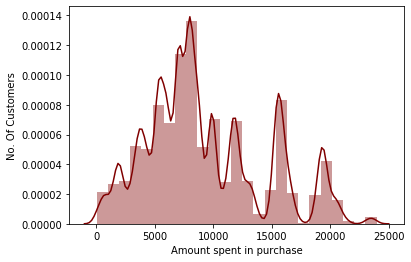

In [5]:
sns.distplot(dataset['Purchase'],color='maroon',bins=25)
plt.ylabel('No. Of Customers')
plt.xlabel("Amount spent in purchase")

In [6]:
print('Skewness of data is :',dataset['Purchase'].skew())
print('Kurtosis of data is :',dataset['Purchase'].kurtosis())

Skewness of data is : 0.6001400037087128
Kurtosis of data is : -0.3383775655851702


#### Univariate analysis of target variarble ( Purchase ) shows Gaussian distribution with skewness of 0.56 and kurtosis of -0.42 which is pretty good.

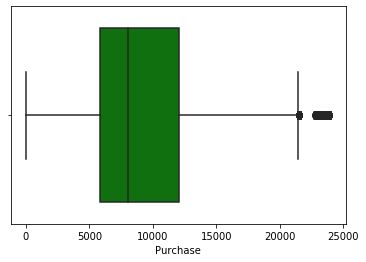

In [7]:
sns.boxplot(dataset['Purchase'],color='green')

#### Box Plot of target variable shows presence of outliers which need to be removed from the data.

### Gender

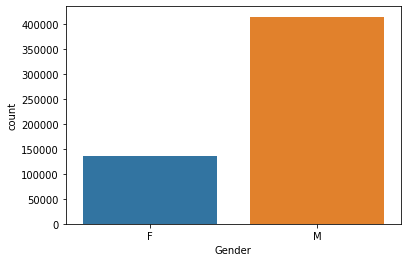

In [8]:
sns.countplot(dataset['Gender'])

#### It can be seen from data that male buyers are relatively more.

### Age

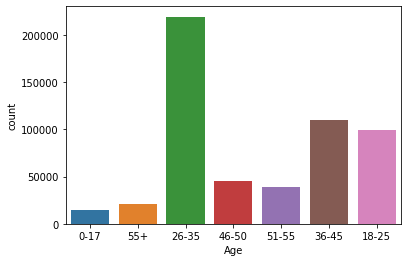

In [9]:
sns.countplot(dataset['Age'])

#### As expected, most purchases are made by people between 18 to 45 years old.

### City Category

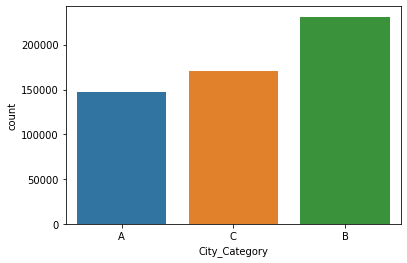

In [10]:
sns.countplot(dataset['City_Category'])

#### City B has relatively more buyers than A & C

### Marital Status

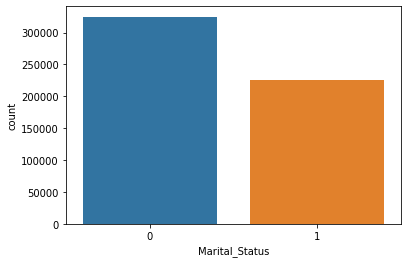

In [11]:
sns.countplot(dataset['Marital_Status'])

#### Unmarried buyers are relatively greater.

### Stay In Current City Years

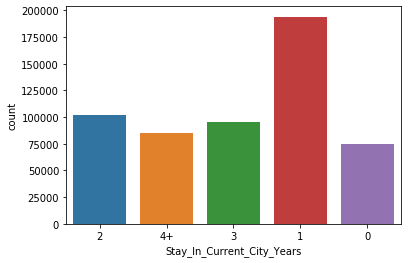

In [12]:
sns.countplot(dataset['Stay_In_Current_City_Years'])

#### People staying in city for year are more keen to buy the product.

### Occupation

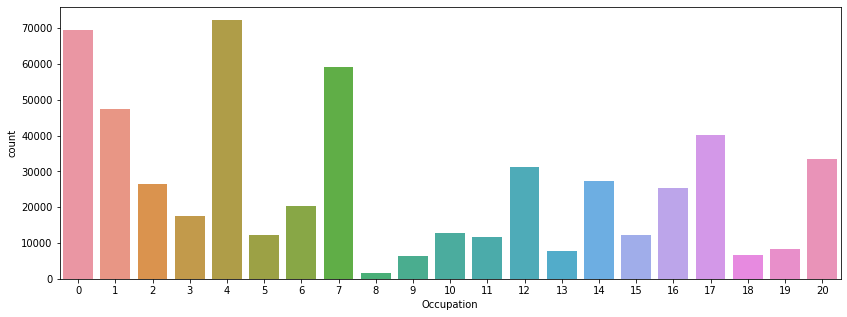

In [13]:
plt.figure(figsize=(14,5))
sns.countplot(dataset['Occupation'])

<ul>
    <li>
        Among all occupations the major concentration lies in 0, 4 & 7</li>
    <li>There are very few buyers having occupation 8</li>
<ul>

## Handling Categorical Values

### OneHotEncoding

In [14]:
gen_onehot_features = pd.get_dummies(dataset['Gender'])
dataset = pd.concat([dataset[['User_ID','Product_ID','Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase']],pd.DataFrame(gen_onehot_features)],axis=1)
gen_onehot_features.head()

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [15]:
gen_onehot_features_city = pd.get_dummies(dataset['City_Category'])
dataset = pd.concat([dataset[['User_ID','Product_ID','Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase','M','F']],pd.DataFrame(gen_onehot_features_city)],axis=1)
gen_onehot_features_city.head()

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


In [16]:
dataset.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,F,A,B,C
0,1000001,P00069042,0-17,10,2,0,3,NaN,NaN,8370,0,1,1,0,0
1,1000001,P00248942,0-17,10,2,0,1,6.0,14.0,15200,0,1,1,0,0
2,1000001,P00087842,0-17,10,2,0,12,NaN,NaN,1422,0,1,1,0,0
3,1000001,P00085442,0-17,10,2,0,12,14.0,NaN,1057,0,1,1,0,0
4,1000002,P00285442,55+,16,4+,0,8,NaN,NaN,7969,1,0,0,0,1


### Missing Values

In [17]:
dataset.isnull()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,F,A,B,C
0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
9,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False


In [18]:
dataset['Product_Category_2'] = dataset['Product_Category_2'].fillna(999)
dataset['Product_Category_3'] = dataset['Product_Category_3'].fillna(999)
dataset['Product_Category_2'] = dataset['Product_Category_2'].astype(int)
dataset['Product_Category_3'] = dataset['Product_Category_3'].astype(int)

In [19]:
dataset.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,F,A,B,C
0,1000001,P00069042,0-17,10,2,0,3,999,999,8370,0,1,1,0,0
1,1000001,P00248942,0-17,10,2,0,1,6,14,15200,0,1,1,0,0
2,1000001,P00087842,0-17,10,2,0,12,999,999,1422,0,1,1,0,0
3,1000001,P00085442,0-17,10,2,0,12,14,999,1057,0,1,1,0,0
4,1000002,P00285442,55+,16,4+,0,8,999,999,7969,1,0,0,0,1


### Mapping Ordered Data

In [20]:
gen_ord_map = {'0-17': 0, '18-25': 1, '26-35': 2, 
               '36-45': 3, '46-50': 4, '51-55': 5,'55+':6}
dataset['Age'] = dataset['Age'].map(gen_ord_map)
dataset.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,F,A,B,C
0,1000001,P00069042,0,10,2,0,3,999,999,8370,0,1,1,0,0
1,1000001,P00248942,0,10,2,0,1,6,14,15200,0,1,1,0,0
2,1000001,P00087842,0,10,2,0,12,999,999,1422,0,1,1,0,0
3,1000001,P00085442,0,10,2,0,12,14,999,1057,0,1,1,0,0
4,1000002,P00285442,6,16,4+,0,8,999,999,7969,1,0,0,0,1


### LabelEncoding

In [21]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
genre_labels = gle.fit_transform(dataset['Stay_In_Current_City_Years'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dataset['Stay_In_Current_City_Years'] = genre_labels

In [22]:
# gle = LabelEncoder()
# genre_labels = gle.fit_transform(dataset['Product_ID'])
# genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
# genre_mappings
# dataset['Product_ID'] = genre_labels

In [23]:
gle = LabelEncoder()
genre_labels = gle.fit_transform(dataset['User_ID'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dataset['User_ID'] = genre_labels

In [24]:
dataset.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,F,A,B,C
0,0,P00069042,0,10,2,0,3,999,999,8370,0,1,1,0,0
1,0,P00248942,0,10,2,0,1,6,14,15200,0,1,1,0,0
2,0,P00087842,0,10,2,0,12,999,999,1422,0,1,1,0,0
3,0,P00085442,0,10,2,0,12,14,999,1057,0,1,1,0,0
4,1,P00285442,6,16,4,0,8,999,999,7969,1,0,0,0,1


## Removing Outliers

In [25]:
from scipy import stats
z = np.abs(stats.zscore(dataset['Purchase']))

threshold = 2.33
np.where(z > 2.33)

dataset = dataset[(z<2.33)]

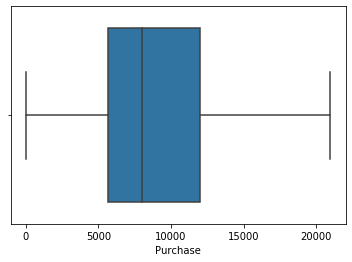

In [26]:
sns.boxplot(dataset['Purchase'])

## Splitting Data

In [27]:
X = dataset[['User_ID','Age', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'M', 'A', 'B']] 

y = dataset['Purchase'] 

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training Model

### Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

print("Intercept:",regressor.intercept_)
print("\nSlope:",regressor.coef_)

y_pred = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Intercept: 12256.106468607572

Slope: [ 1.47377173e-02  1.03841692e+02  5.10609694e+00  1.15122541e+01
 -5.44952765e+01 -3.58923944e+02 -3.29124814e-01 -1.98379569e+00
  4.53149844e+02 -5.84376688e+02 -4.62667210e+02]
Mean Absolute Error: 3395.952104107961
Mean Squared Error: 19756784.472879212
Root Mean Squared Error: 4444.860455951257


### XGBoost

In [ ]:
%%time
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.2,
                max_depth = 10, alpha = 15, n_estimators = 1000)

xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/Users/girishsalunke/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [ ]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot(y_test,y_test,color='red')

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=66, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


<h2> CONCLUSION </h2>
<p>
<b>We tried 3 models on the same regression problem:- </b>
<ul>
<li>Random forest regressor gives an RMSE of 2900.</li>
<li> Linear regression gives an RMSE of 4444.</li>
 <li>XGBoost gives an RMSE of 2729.</li>
</ul>
<br>
 <b>Out of the 3 models XGBoost gives the lowest RMSE.
 Hence we  will use that model.<b>
    </p>